## TASK 4 

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style='whitegrid')

bank_data = pd.read_csv("bs140513_032310.csv")

bank_data.head()




,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
bank_data.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB



The dataset contains 9 features and 1 target variable, the features of the customers are as follows:

Customer: This feature represents the customer id,
<br>
zipCodeOrigin: The zip code of origin/source, 
<br>
Merchant: The merchant's id, 
<br>
zipMerchant: The merchant's zip code,
<br>
Age: Categorized age, 
<br>
0: <= 18,
1: 19-25,
2: 26-35,
3: 36-45,
4: 46-55,
5: 56-65,
6: > 65
U: Unknown, 
<br>
Gender: Gender for customer, 
<br>
E : Enterprise,
<br>
F: Female,
<br>
M: Male,
<br>
U: Unknown, 
<br>
Category: Category of the purchase, like leisure, transport etc, 
<br>
Amount: Amount of the purchase,
<br>
Fraud: It is the target Variable which shows is the transaction 'fraud' -> 1 or 'non-fraud' -> 0.

In [5]:
fraud_counts = bank_data['fraud'].value_counts()
fraud_counts

0    587443
1      7200
Name: fraud, dtype: int64

As we can see that the fraud data is imbalanced beacause, their are less number of frauds and more non fraudulent transactions, this might affect the model while training. One solution to this is sampling [A. Fernández, S. García, et .al,2018], By producing instances from the minority class, oversampling increases the number of members of that class. By choosing random points from the majority class until it is equal to the minority class, undersampling reduces the number of occurrences in the majority class. There are some problems associated with both operations: Oversampling will produce duplicates or comparable data points, which occasionally won't be useful in cases of fraud detection since fraudulent transactions can differ.In case of undersampling we lose data points thus useful information. So for our case we can use SMOTE(Synthetic Minority Over Sampling Techique) [T. C. Tran and T. K. Dang, 2021], What SMOTE does is create new data points from the neighbouring instance so that generated samples are not same but somewhat related.

In [6]:
print("Mean values of features by per category",bank_data.groupby('category')['amount','fraud'].mean())

Mean values of features by per category                               amount     fraud
category                                      
'es_barsandrestaurants'    43.461014  0.018829
'es_contents'              44.547571  0.000000
'es_fashion'               65.666642  0.017973
'es_food'                  37.070405  0.000000
'es_health'               135.621367  0.105126
'es_home'                 165.670846  0.152064
'es_hotelservices'        205.614249  0.314220
'es_hyper'                 45.970421  0.045917
'es_leisure'              288.911303  0.949900
'es_otherservices'        135.881524  0.250000
'es_sportsandtoys'        215.715280  0.495252
'es_tech'                 120.947937  0.066667
'es_transportation'        26.958187  0.000000
'es_travel'              2250.409190  0.793956
'es_wellnessandbeauty'     65.511221  0.047594


C:\Users\prana\AppData\Local\Temp\ipykernel_17116\2337091941.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print("Mean values of features by per category",bank_data.groupby('category')['amount','fraud'].mean())


We can see the mean amount and fraud percent by category below, As we can see fraudsters are choosing more leisure and travel category because people spend more than average. Below table shows it clearly.

In [7]:
fraud = bank_data.loc[bank_data.fraud ==1 ]
non_fraud = bank_data.loc[bank_data.fraud ==0 ]

pd.concat([fraud.groupby('category')['amount'].mean(),non_fraud.groupby('category')['amount'].mean(),\
           bank_data.groupby('category')['fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

,Fraudulent,Non-Fraudulent,Percent(%)
category,,,
'es_transportation',NaN,26.958187,0.000000
'es_food',NaN,37.070405,0.000000
'es_hyper',169.255429,40.037145,4.591669
'es_barsandrestaurants',164.092667,41.145997,1.882944
'es_contents',NaN,44.547571,0.000000
'es_wellnessandbeauty',229.422535,57.320219,4.759380
'es_fashion',247.008190,62.347674,1.797335
'es_leisure',300.286878,73.230400,94.989980
'es_otherservices',316.469605,75.685497,25.000000


As we can see average amount spend in all  categories are similar; between 0-500, so by the discarding the outliers, except for the travel category which goes very high. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


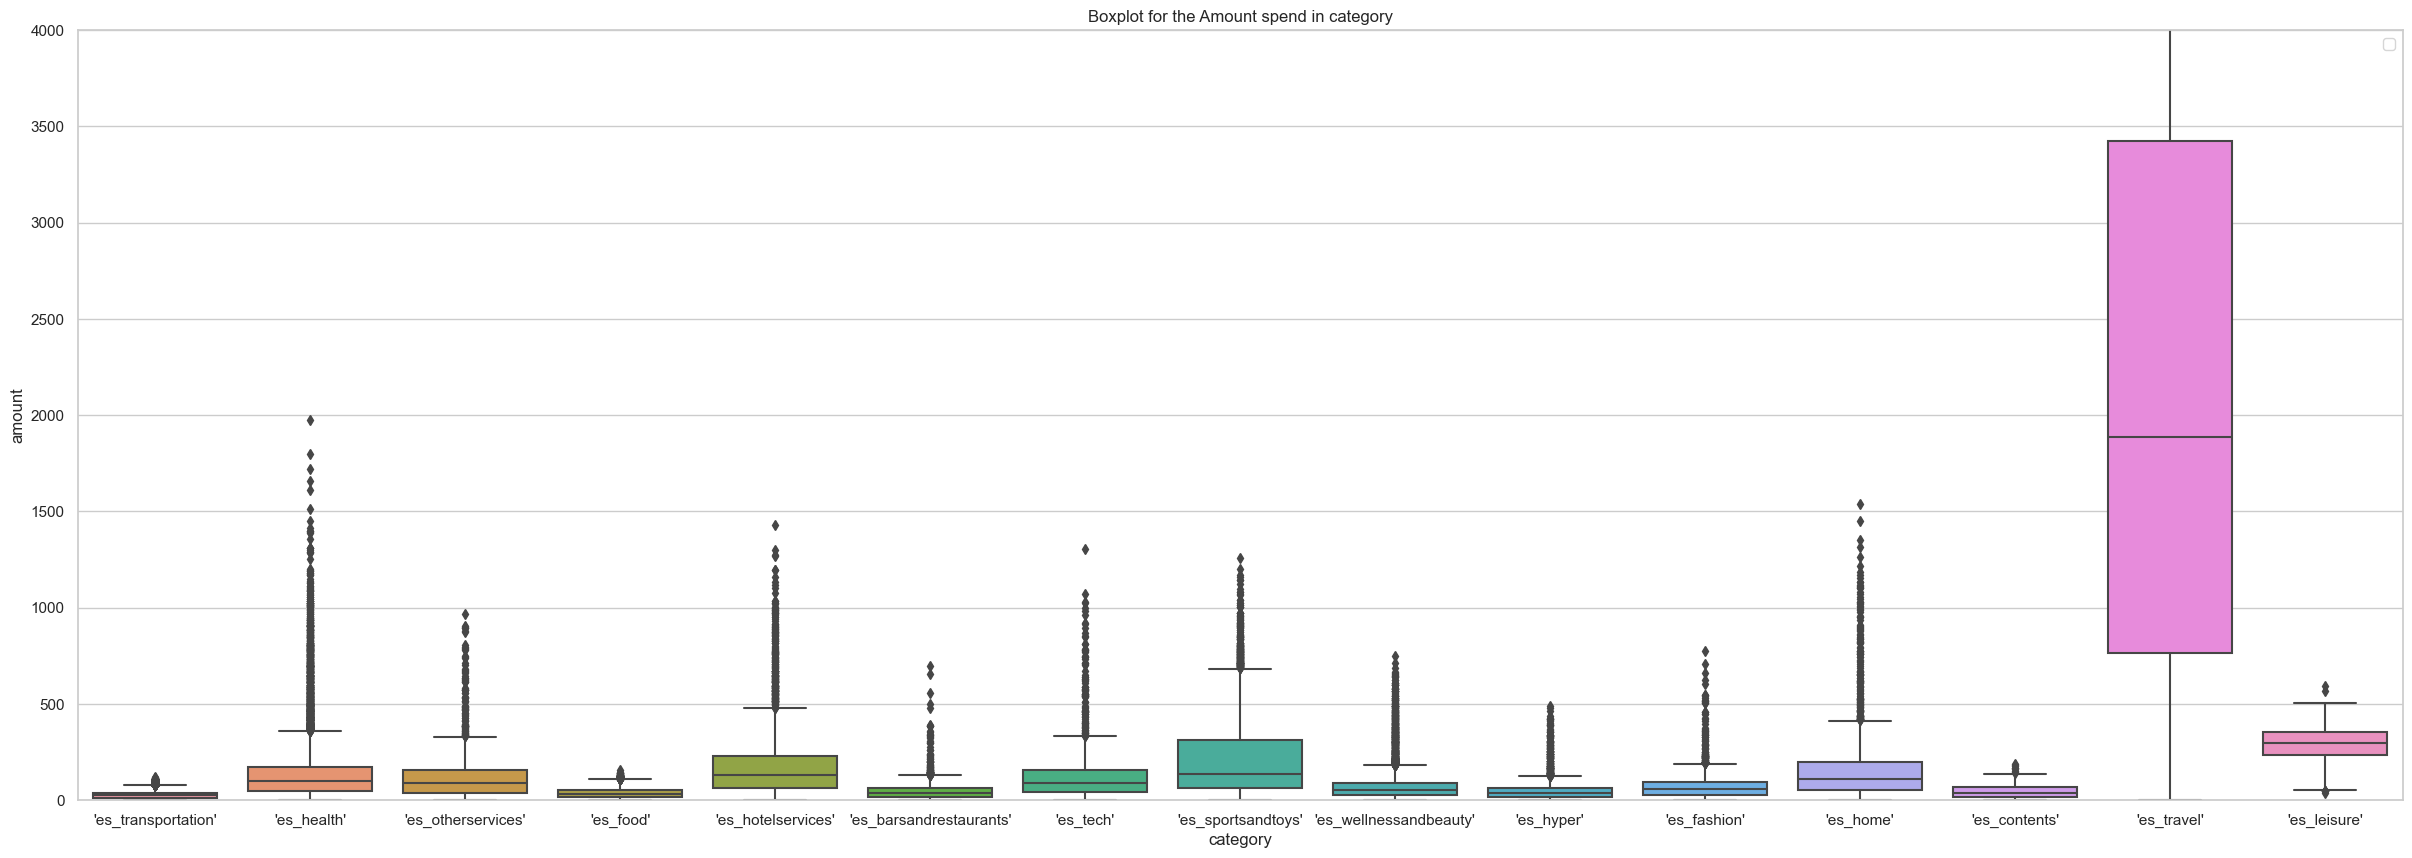

In [8]:
plt.figure(figsize=(30,10))
sns.boxplot(x=bank_data.category,y=bank_data.amount)
plt.title("Boxplot for the Amount spend in category")
plt.ylim(0,4000)
plt.legend()
plt.show()

From the above box plot categories like 'es_travel' and 'es_leisure' have higher median transaction amounts and wider IQRs compared to others, indicating more variability in transaction amounts.
Categories like 'es_transportation' have a low median transaction amount and a very tight IQR, suggesting that transactions in this category are generally consistent and of lower value.
Categories with a high number of outliers, particularly those with very high transaction amounts, could be more susceptible to fraud. For example, 'es_travel' has a significant number of high-value outliers, which could be a red flag for fraudulent activities.

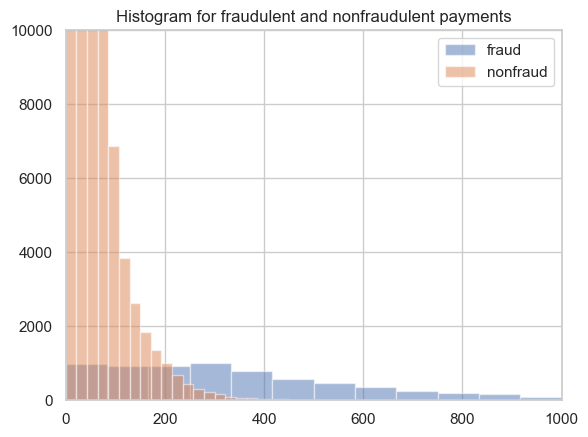

In [9]:
plt.hist(fraud.amount, alpha=0.5, label='fraud',bins=100)
plt.hist(non_fraud.amount, alpha=0.5, label='nonfraud',bins=100)
plt.title("Histogram for fraudulent and nonfraudulent payments")
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

The histogram suggests that while fraud can occur at any transaction amount, the majority of fraudulent transactions are concentrated at lower values, which is common as fraudsters often test systems with smaller amounts to avoid detection.

**Data PreProcessing**

In [10]:
print("Unique values of ZipCodeOri: ",bank_data.zipcodeOri.nunique())
print("Unique values of ZipMerchant : ",bank_data.zipMerchant.nunique())


Unique values of ZipCodeOri:  1
Unique values of ZipMerchant :  1


As we can see there are only one unique zipCode values so we will drop them.

In [11]:
bank_data_reduced = bank_data.drop(['zipcodeOri','zipMerchant'],axis=1)

In [12]:
bank_data_reduced.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0


Now some of the columns are in string format we will convert them to numerical for making it easy for models to interpret and train

In [13]:
col_categorical = bank_data_reduced.select_dtypes(include= ['object']).columns
for col in col_categorical:
    bank_data_reduced[col] = bank_data_reduced[col].astype('category')
# categorical values ==> numeric values
bank_data_reduced[col_categorical] = bank_data_reduced[col_categorical].apply(lambda x: x.cat.codes)
bank_data_reduced.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


In the above code The loop goes through each of these columns. Changes their data type to "category" using the astype('category') function. This way it tells pandas that the data, in these columns should be considered as categorical which can potentially help save memory and improve the speed of operations.After the conversion process the categorical columns are transformed into codes. This is achieved by utilizing a function that is applied to each column using apply(lambda x; x.cat.codes). The attribute.cat.codes which belongs to the type assigns an integer code to each level of the categorical variable (similar, to label encoding). For instance if we have a column named "color" with categories such, as ['red' 'blue' 'green'] these categories would be converted into values like [0, 1 2].

In [14]:
X = bank_data_reduced.drop(['fraud'],axis=1)
y = bank_data['fraud']
print(X.head(),"\n")
print(y.head())

   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72 

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


In [15]:
y[y==1].count()

7200

As mentioned above the count of fraudelent transactions is very less i.e 7200 so we now carry out SMOTE for balancing the datset.

**SMOTE Oversampling**

In [16]:
from imblearn.over_sampling import SMOTE


SM = SMOTE(random_state=42)
X_chng, y_chng = SM.fit_resample(X, y)
y_chng = pd.DataFrame(y_chng)
y_chng

,fraud
0,0
1,0
2,0
3,0
4,0
...,...
1174881,1
1174882,1
1174883,1
1174884,1


In [17]:
print(y_chng.value_counts())

fraud
0        587443
1        587443
dtype: int64


Now we can see there are exact number of counts of both 0 and 1


In [18]:
#splitting the data into test and training set
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_chng,y_chng,test_size=0.3,random_state=42,shuffle=True,stratify=y_chng)

y_train_1 = y_train.iloc[:,0]

In [19]:
y_train = y_train.fraud
y_train

903303     1
721176     1
680561     1
1154749    1
752766     1
          ..
705232     1
652698     1
465780     0
246158     0
899256     1
Name: fraud, Length: 822420, dtype: int64

In [30]:
from sklearn.metrics import auc, roc_curve


def print_auc(y_test, preds):
    
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    print("AUC Score: ", roc_auc)
    

**Model Selection**

We are now all done with pre-processing , EDA , data Cleaning everything we start building our model, so after going through numerous papers I found that most Bank Fraud Checking systems used following Logistic Regression, K-nearest Neighbor, Decision Tree or Random Forest Classifier [J. K. Afriyie, K. Tawiah, et .al, 2023]. From these we are gonna try Logistic Regression, KNN and Random Forest Classifier.

**KNN**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,p=1)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix


print("Classification Report for K-Nearest Neighbours: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of K-Nearest Neigbours: \n", confusion_matrix(y_test,y_pred))
print_auc(y_test, knn.predict_proba(X_test)[:,1])



Classification Report for K-Nearest Neighbours: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    176233
           1       0.97      0.99      0.98    176233

    accuracy                           0.98    352466
   macro avg       0.98      0.98      0.98    352466
weighted avg       0.98      0.98      0.98    352466

Confusion Matrix of K-Nearest Neigbours: 
 [[170106   6127]
 [  1079 175154]]
AUC Score:  0.9952179161609855


The precision score indicates that model is 99% time correct for non-fraudulent transactions and 97% times for fradulent transactions. Looking at the confusion matrix out of 176,233 fraudulent transactions the model incorrectly predicted 6,127 as fraudulent while only missing 1,079 fraudulent transactions out of 176,233 by marking them as non fraudulent. The overall accuracy rate stands at 98% indicating a level of predictions.

The AUC score serves as a performance metric for classification problems across threshold settings. Is recorded at an impressive value close to 1. Specifically at 0.995. This signifies that our model excels, in distinguishing between non-fraudulent transactions.

In terms we can confidently say that our KNN model performs well in detecting instances of fraud in bank transactions, now we try logistic and Random Forest Classifier.

**Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)
print("Classification Report for Logistic Regression: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of Logistic Regression: \n", confusion_matrix(y_test,y_pred))
print_auc(y_test, lg.predict_proba(X_test)[:,1])

c:\Users\prana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92    176233
           1       0.95      0.89      0.92    176233

    accuracy                           0.92    352466
   macro avg       0.92      0.92      0.92    352466
weighted avg       0.92      0.92      0.92    352466

Confusion Matrix of Logistic Regression: 
 [[167580   8653]
 [ 19093 157140]]
AUC Score:  0.9742052378320574


Based on the confusion matrix we can see that out of a total of 176,233 fraudulent transactions there were 8,653 instances where they were mistakenly predicted as fraudulent. Additionally the model failed to detect 19,093 transactions. The AUC score of 0.974 indicates an ability to distinguish between the two classes although it is slightly lower, than what was achieved with the KNN model.

In summary while the Logistic Regression model is performing overall it may not be as effective as the KNN model, for this task. Depending on the banks requirements regarding positives and false negatives it might be worth considering another model.

**Random Forest Classifier**

In [33]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,
                                verbose=1,class_weight="balanced")

rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

print("Classification Report for Random Forest Classifier: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of Random Forest Classifier: \n", confusion_matrix(y_test,y_pred))
print_auc(y_test, rf_clf.predict_proba(X_test)[:,1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished


Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    176233
           1       0.97      0.99      0.98    176233

    accuracy                           0.98    352466
   macro avg       0.98      0.98      0.98    352466
weighted avg       0.98      0.98      0.98    352466

Confusion Matrix of Random Forest Classifier: 
 [[170106   6127]
 [  1079 175154]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AUC Score:  0.9970690777903146


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished


The Random Forest Classifier has shown results when it comes to detecting bank fraud. It achieves precision rates for both non-fraudulent  (99%) and fraudulent transactions (97%) indicating its reliability, in identifying fraudulent activities. Moreover, the classifier demonstrates recall rates correctly identifying 97% of fraudulent transactions and 99% of fraudulent ones. 

With an accuracy rate of 98% this models performance is commendable considering the complexity of the task at hand. The confusion matrix further reveals insights; a low number of false positives (6,127) and an extremely low number of false negatives (1,079). In fraud detection minimizing negatives is crucial as they represent instances of fraud that are missed  [Dong, X., et al. (2020)].

Based on these metrics it can be concluded that the Random Forest Classifier performs comparably to the mentioned K Nearest Neighbors model and outperforms the Logistic Regression model for this task. Its consistent high precision and recall across both classes make it a reliable choice, for detecting transactions.

**REFERENCES**

[1]  A. Fernández, S. García, M. Galar, R. C. Prati, B. Krawczyk and F.Herrera, Learning from Imbalanced Data Sets, Switzerland: Springer, 2018. 
<br>
[2]T. C. Tran and T. K. Dang, "Machine Learning for Prediction of Imbalanced Data: Credit Fraud Detection," 2021 15th International Conference on Ubiquitous Information Management and Communication (IMCOM), Seoul, Korea (South), 2021, pp. 1-7, doi: 10.1109/IMCOM51814.2021.9377352.
<br>
[3]  J. K. Afriyie, K. Tawiah, W. A. Pels, S. Addai-Henne, H. A. Dwamena, E. O. Owiredu, S. A. Ayeh and J. Eshun,"A supervised machine learning algorithm for detecting and predicting fraud in credit card transactions", Decision Analytics Journal, 2023.
<br>
[4]Dong, X., et al. (2020). A survey on ensemble learning.